<h1 style="font-size: 60px; color: #02475e; text-align: center">Stars recognition project</h1>

<hr style="height: 3px;background-color: #02475e"/>

<h1 style="font-size: 35px; color: #02475e">Introduction</h1>
<h2 style="color: #687980">Objective of the project: </h2>
<h2 style="color: #687980"> -> Guess the star type with some basic information</h2>
<h3 style="color: #687980; font-size: 24px">Frog group members &#128056;:</h3>
<ul>
    <li style="color: #687980; font-size: 17px">Astronaute <b>Mohamed Belhadj </b></li>
    <li style="color: #687980; font-size: 17px">Astronaute <b>Roat Kim</b></li>
    <li style="color: #687980; font-size: 17px">Astronaute <b>Paniz Akherati</b></li>
    <li style="color: #687980; font-size: 17px">Astronaute <b>Shahin Abdi</b></li>
    <li style="color: #687980; font-size: 17px">Astronaute <b>Martin Hurel</b></li>
</ul>

<img src="https://cdn.wallpapersafari.com/90/35/H5A0BU.jpg"/>

<hr style="height: 3px;background-color: #02475e"/>

<h2 style="font-size: 35px; color: #02475e">Sommaire</h2>
<ul>
  <li><h3 style="color: #687980; font-size: 25px">I. Import and visualisation of the data (how our dataset is structure...)</h3></li>
  <li><h3 style="color: #687980; font-size: 25px">II. Wich model we decide to use (and why)</h3></li>
  <li><h3 style="color: #687980; font-size: 25px">III. Our model in action</h3></li>
</ul>

<hr style="height: 3px;background-color: #02475e"/>

<h2 style="font-size: 35px; color: #02475e">I. Import and visualisation of the data (how our dataset is structure...)</h2>

<h3 style="color: #687980; font-size: 25px">a. Introduction</h3>

In [9]:
import pandas as pd
df = pd.read_csv('data/stars.csv')

<p style="color: #687980; font-size: 17px">The original dataframe come from Kaggle and is call "Star dataset to predict star types". <br> As we'll see, it contains 240 rows and 7 columns.</p>

<h3 style="color: #687980; font-size: 25px">b. Basic information</h3>

In [10]:
df.tail()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Blue,O
236,30839,834042.0,1194.0,-10.63,5,Blue,O
237,8829,537493.0,1423.0,-10.73,5,White,A
238,9235,404940.0,1112.0,-11.23,5,White,A
239,37882,294903.0,1783.0,-7.80,5,Blue,O


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


<h3 style="color: #687980; font-size: 25px">c. Formatting data</h3>

In [12]:
from sklearn.preprocessing import LabelEncoder

inputs = df.drop(['Star type', 'Spectral Class', 'Star color'],axis=1)

target = df['Star type']

<h3 style="color: #687980; font-size: 25px">d. Data visualisation</h3>

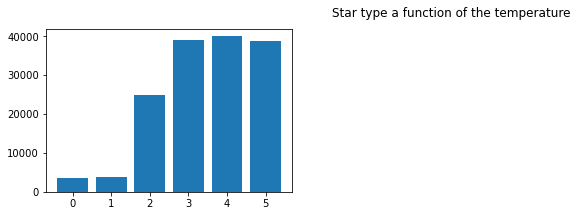

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.bar(df['Star type'], df['Temperature (K)'])
plt.suptitle('Star type a function of the temperature')
plt.show()

<p style="color: #687980; font-size: 17px">The first graph show us that the bigger is the star the hotter she is</p>

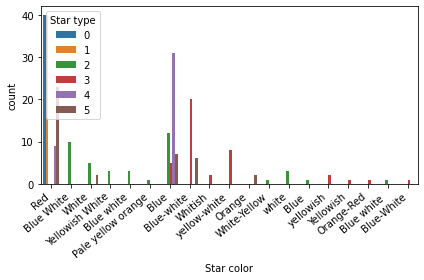

In [14]:
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Star color", hue="Star type", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

<p style="color: #687980; font-size: 17px">The majority of stars seem to be blue or red.</p>

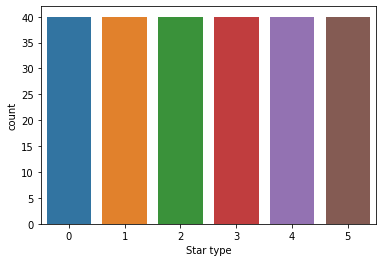

In [15]:
ax = sns.countplot(x="Star type",data=df)

<p style="color: #687980; font-size: 17px">This graph show us that our data set is good because we have the same amount of data for each star type, so our algorithms  is balanced</p>

<hr style="height: 3px;background-color: #02475e"/>

<h2 style="font-size: 35px; color: #02475e">II. Wich model we decide to use (and why)</h2>

<p style="color: #687980; font-size: 20px">We made a function that take multiple models, test them and sort them by the best acurrency</p>

In [16]:
import numpy as np
import time
import datetime

from sklearn import svm, datasets, metrics
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

def tri_insertion_desc(tableau1,tableau2):
    for i in range(1,len(tableau1)):
        en_cours1 = tableau1[i]
        en_cours2 = tableau2[i]
        j = i
        #décalage des éléments du tableau }
        while (j>0) and (tableau1[j-1]<en_cours1):
            tableau1[j]=tableau1[j-1]
            tableau2[j]=tableau2[j-1]
            j = j-1
        #on insère l'élément à sa place
        tableau1[j]=en_cours1
        tableau2[j]=en_cours2

def knn(x_train,y_train,x_test,y_test):
    clf = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train)
    ypred = clf.predict(x_test)
    result = metrics.accuracy_score(y_test, ypred)
    return round(result, 5)

def svm_lin(x_train,y_train,x_test,y_test):
    clf  = svm.SVC(kernel='linear', C=1).fit(x_train,y_train)
    ypred = clf.predict(x_test)
    result = np.float64(metrics.accuracy_score(y_test, ypred))
    return result

def gaussian_nb(x_train,y_train,x_test,y_test):
    clf  = GaussianNB().fit(x_train, y_train)
    ypred = clf.predict(x_test)
    result = np.float64(metrics.accuracy_score(y_test, ypred))
    return result

def logistic_regression(x_train,y_train,x_test,y_test):
    clf  = LogisticRegression().fit(x_train, y_train)
    ypred = clf.predict(x_test)
    result = np.float64(metrics.accuracy_score(y_test, ypred))
    return result

def sgd_classifier(x_train,y_train,x_test,y_test):
    clf  = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3)).fit(x_train, y_train)
    ypred = clf.predict(x_test)
    result = np.float64(metrics.accuracy_score(y_test, ypred))
    return result

def random_forest_classifier(x_train,y_train,x_test,y_test):
    model = RandomForestClassifier(n_estimators=10)
    model.fit(x_train, y_train)
    result = model.score(x_test,y_test)
    return result

def decision_tree_classifier(x_train,y_train,x_test,y_test):
    clf  = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
    ypred = clf.predict(x_test)
    result = np.float64(metrics.accuracy_score(y_test, ypred))
    return result

def verify(models, models_name, counter, test_size):
    # We start the timer to see how long the function will take to execute
    start_time = time.time()
    
    seed_value = 1
    # We initialize for the first loop our training and test data
    x, y = inputs, target
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed_value)
    
    values = []    
    
    # We loop every models Counter time (counter value is defined we the def is call)
    for y in range(counter):
        # We loop throught every models to calculate his accuracy
        for x in range(len(models)):
            # If this is the first loop, we simply add the values in the array
            if(len(values) < len(models)):
                values.append((models[x](x_train,y_train,x_test,y_test)))
                
            # If this isn't the first loop, we add the value to the last value collected
            else:
                values[x] = values[x] + models[x](x_train,y_train,x_test,y_test)
        
        x, y = inputs, target

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed_value)
        
    #We add all the value together by model and divide by the Counter number
    values = [x/counter for x in values]
    # We sorted the models_name array with the values index

    print("\n")
    tri_insertion_desc(values,models_name) 

    result = []
    # We create the 'beautiful' array to rend
    for x in range(len(models_name)):
        models_name[x] = '#' + str(x + 1) + ' ' + models_name[x] + ': ' + str(round(values[x], 8))
        
    # We check how long it has take to execute the function
    avgString = datetime.timedelta(seconds=(time.time() - start_time))
    avgString = str(avgString).split(".")[0]

    print("\u0332".join("Classement des differents modèles qui ont tourné " + str(counter) + " fois:"))
    print("\n")
    print(*models_name, sep = "\n")
    print("\n")
    print('Executé en ' + avgString)

# We choose wich models we want to test
# Every models must have a def to calculate his predictions
models = [knn , gaussian_nb, sgd_classifier, decision_tree_classifier, svm_lin, random_forest_classifier] 
models_name = ['Knn', 'GaussianNB', 'SGDClassifier', 'DecisionTreeClassifier', 'Svm', 'RandomForestClassifier']

verify(models, models_name, 1, 0.7)



C̲l̲a̲s̲s̲e̲m̲e̲n̲t̲ ̲d̲e̲s̲ ̲d̲i̲f̲f̲e̲r̲e̲n̲t̲s̲ ̲m̲o̲d̲è̲l̲e̲s̲ ̲q̲u̲i̲ ̲o̲n̲t̲ ̲t̲o̲u̲r̲n̲é̲ ̲1̲ ̲f̲o̲i̲s̲:


#1 DecisionTreeClassifier: 0.98214286
#2 RandomForestClassifier: 0.97619048
#3 Svm: 0.91666667
#4 SGDClassifier: 0.89285714
#5 GaussianNB: 0.85119048
#6 Knn: 0.52381


Executé en 0:00:00


<p style="color: #687980; font-size: 20px">As we can see the more precise model is the <b>Random Forest Classifier</b></p>
<p style="color: #687980; font-size: 20px">We decide that we will use for our model</p>

<h2 style="font-size: 35px; color: #02475e">III. Our model in action</h2>

<h3 style="font-size: 26px; color: #02475e">Grid Search to define the best parameter</h3>

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#Ajouter expliications - Justifier les hyperparametre (pourquoi on les a choisis )
param_grid = { 
    'n_estimators': range(100,500,50),
    'max_features' : ['auto','sqrt'],
    'max_depth' : [2,4,6,8],
    'min_samples_split' : [2,5],
    'min_samples_leaf' : [1,2],
    'bootstrap' : [True, False]
    
}
rfc = RandomForestClassifier()
x, y = inputs, target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, verbose = 2, n_jobs = 4)
CV_rfc.fit(x_train, y_train)

best_param = CV_rfc
print(CV_rfc.best_params_['n_estimators'])

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   18.5s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   40.5s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 2560 out of 2560 | elapsed:  4.2min finished


150


In [19]:
best_param_estimator = CV_rfc.best_params_["n_estimators"]

<h3 style="font-size: 26px; color: #02475e">Our model</h3>

In [29]:
modelToShow = RandomForestClassifier(n_estimators=best_param_estimator)
x, y = inputs, target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7)
modelToShow .fit(x_train, y_train)
modelToShow .score(x_test,y_test)

0.9880952380952381

In [30]:
def random_forest_classifier(x_train,y_train,x_test,y_test):
    model = RandomForestClassifier(n_estimators=best_param_estimator)
    model.fit(x_train, y_train)
    result = model.score(x_test,y_test)
    return result

models = [random_forest_classifier] 
modelsName = ['RandomForestClassifier']

verify(models, modelsName, 1, 0.7)



C̲l̲a̲s̲s̲e̲m̲e̲n̲t̲ ̲d̲e̲s̲ ̲d̲i̲f̲f̲e̲r̲e̲n̲t̲s̲ ̲m̲o̲d̲è̲l̲e̲s̲ ̲q̲u̲i̲ ̲o̲n̲t̲ ̲t̲o̲u̲r̲n̲é̲ ̲1̲ ̲f̲o̲i̲s̲:


#1 RandomForestClassifier: 0.99404762


Executé en 0:00:00


<p style="color: #687980; font-size: 20px">We can see that by increasing the variable "n_estimators" our model is more precise and the execution time isn't very long (< 1s)</p>

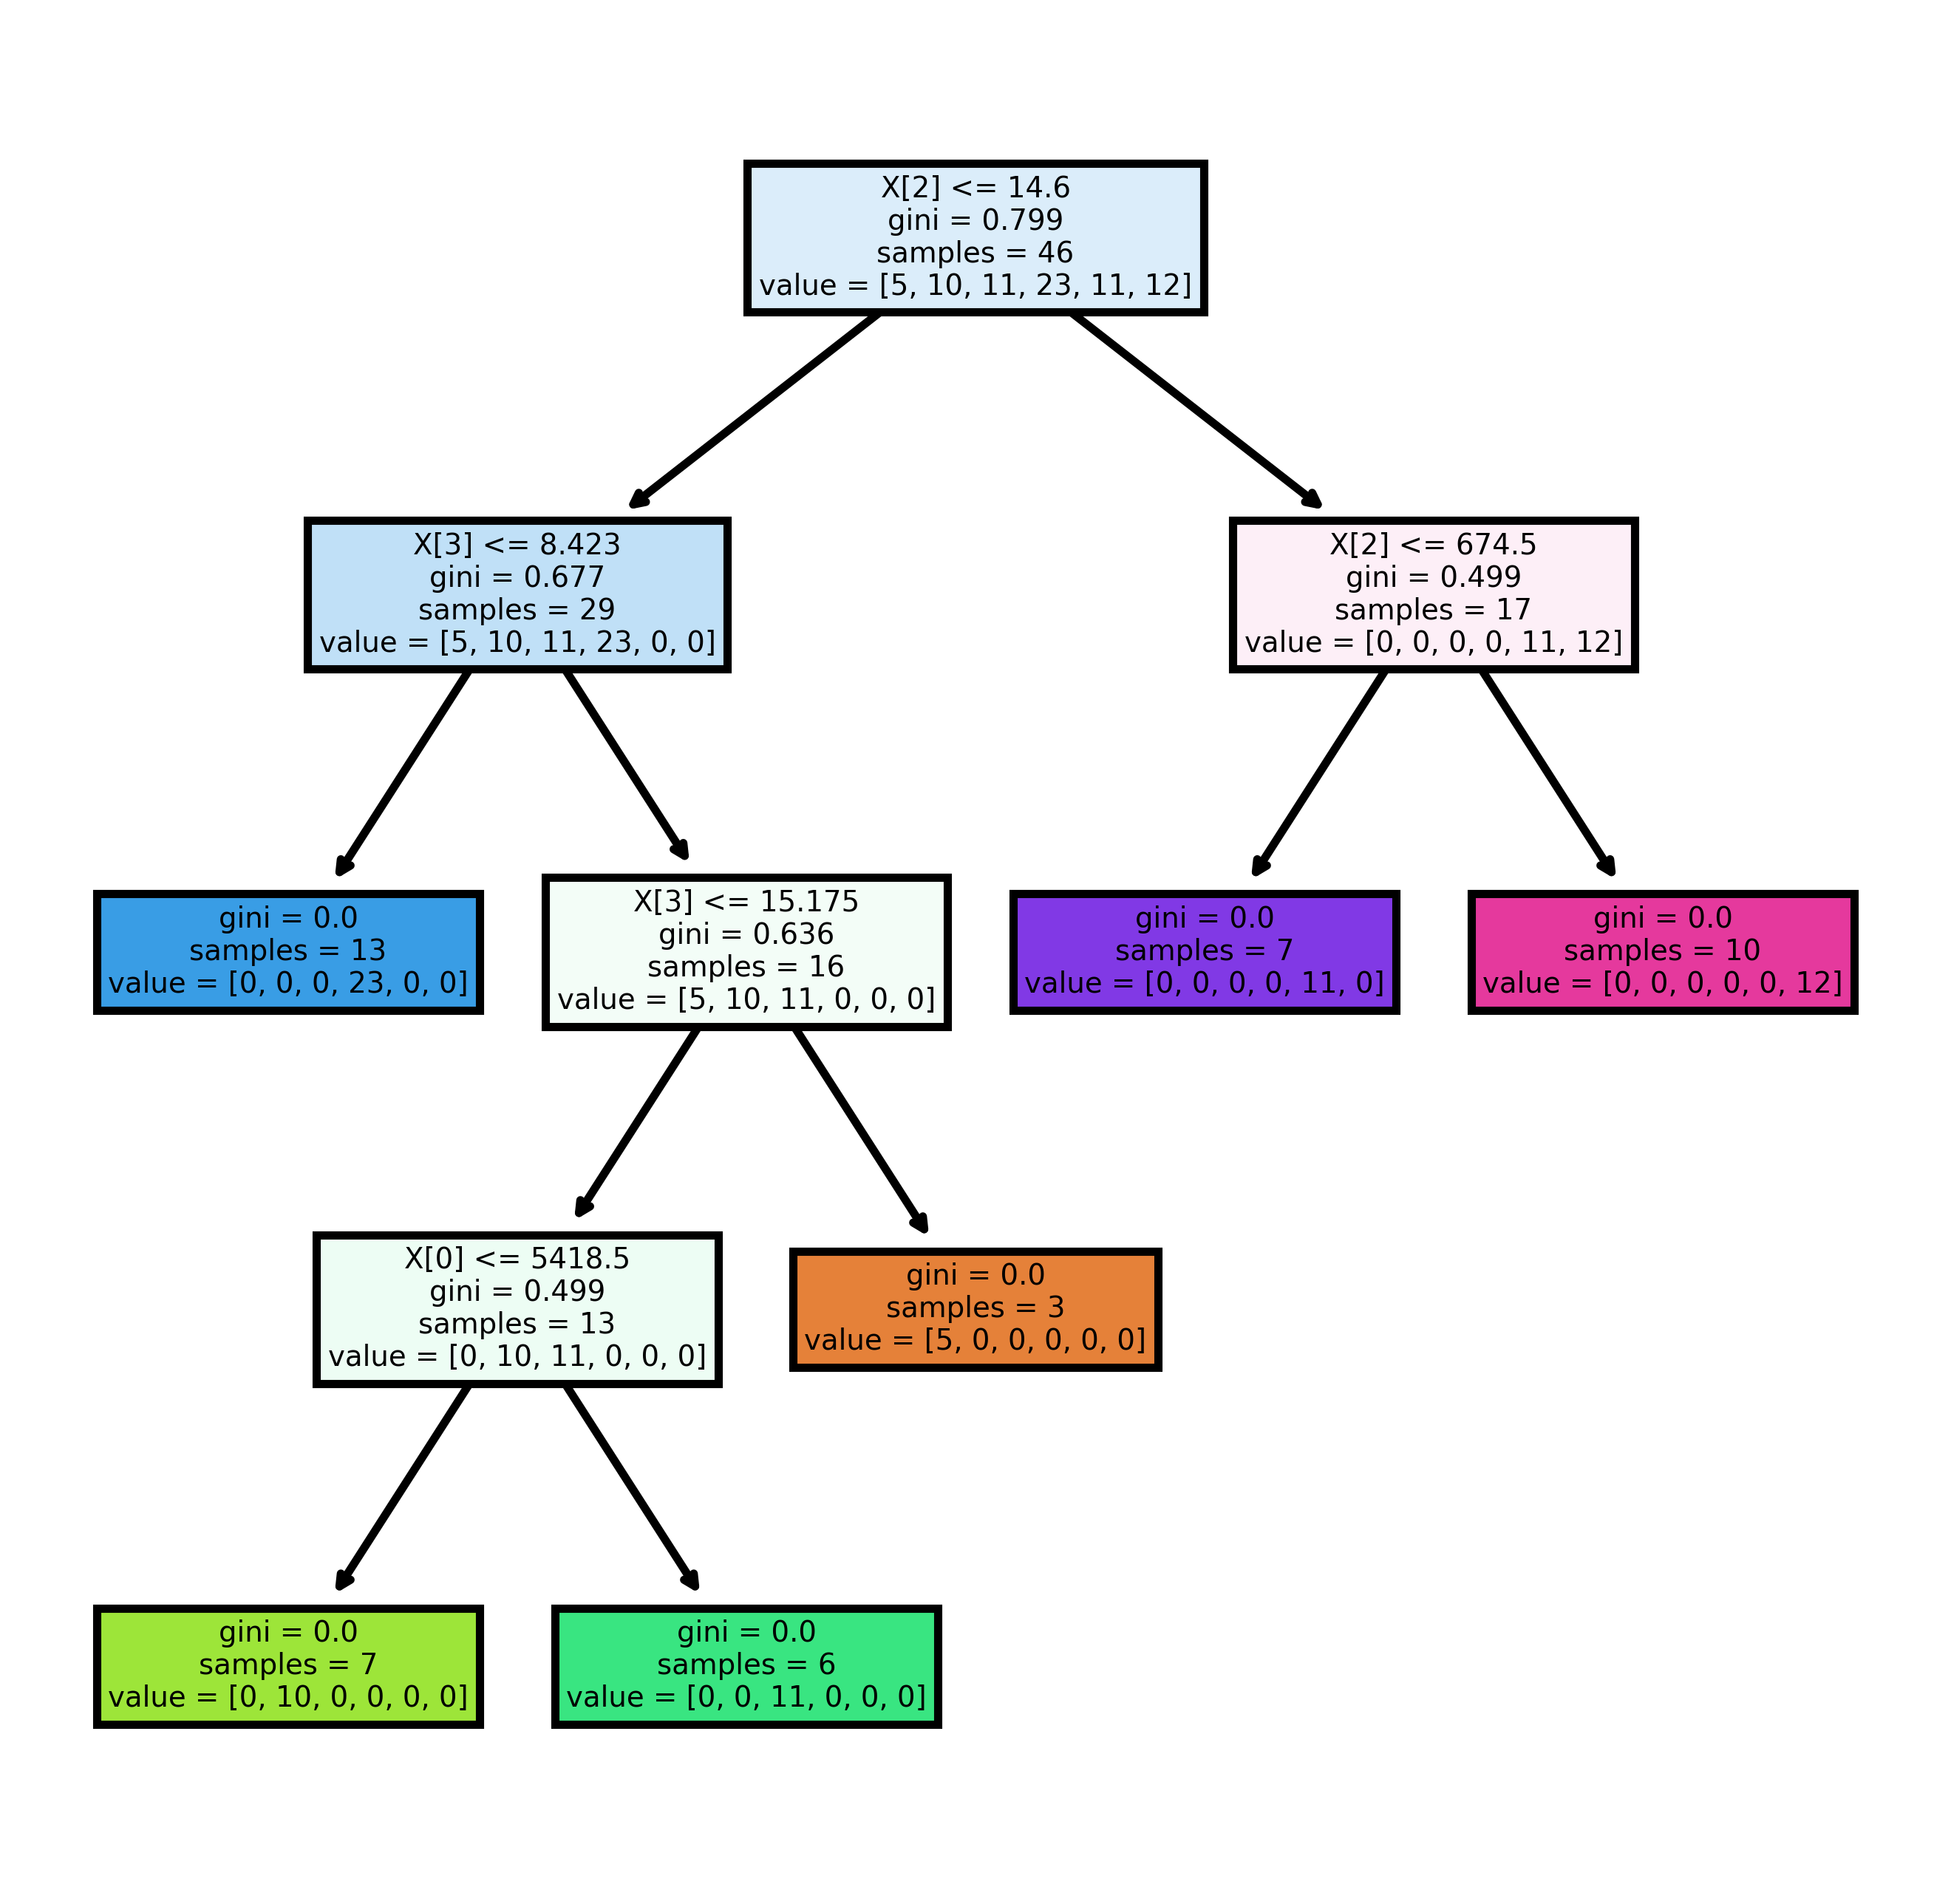

In [31]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(modelToShow.estimators_[0],
               filled = True);print
fig.savefig('rf_individualtree.png')

<h2 style="font-size: 35px; color: #02475e">IV. Our API in progress</h2>

<p style="color: #687980; font-size: 20px">For our api we want that by sending data to it, the api give you the <b>Star type</b> and some informations about this type of star</p>
<p style="color: #687980; font-size: 20px">It will look like that: (but much cooler) </p>

In [32]:
x, y = inputs, target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = RandomForestClassifier(n_estimators=CV_rfc.best_params_['n_estimators'])
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

import pickle
import os 
import pathlib

abspath = pathlib.Path('randomf_model.pkl').absolute()
with open(str(abspath), 'wb') as f:
#we use pickle to dump our model (serialization)
    pickle.dump(model, f)
    print("We've created a pickle file in the same path as the ipynb file")

We've created a pickle file in the same path as the ipynb file


In [33]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.7)
model = RandomForestClassifier(n_estimators=best_param_estimator)
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
values_to_predict = [(2600,0.000500,0.1542,18.70)]
predict = model.predict(values_to_predict)[0]

if(predict == 0):
    value = 'Brown Dwarf'
elif(predict == 1):
    value = 'Red Dwarf'
elif(predict == 2):
    value = 'White Dwarf'
elif(predict == 3):
    value = 'Main Sequence'
elif(predict == 4):
    value = 'Supergiant'
elif(predict == 5):
    value = 'Hypergiant'

print('The star with the parameters you entered is a ' + value + ' with a precision of : ' + str(round(score*100, 3)) + '%')

The star with the parameters you entered is a Brown Dwarf with a precision of : 97.024%


<p style="color: #687980; font-size: 20px">If you want to see the real API, execute the run_api.py file in the folder</p>